In [4]:
%run start.py

In [6]:
test = pd.read_csv('data/chick003.csv') 
test.head(3)

,hatchery,chick_nm,weight
0,A,a01,112
1,A,a05,116
2,A,a09,106


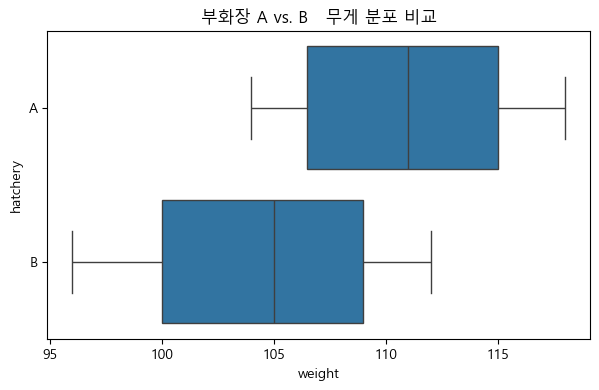

In [8]:
plt.figure(figsize=(7,4))
sns.boxplot(x = 'weight', y = 'hatchery', data= test)
plt.title('부화장 A vs. B   무게 분포 비교', fontsize = 12)
plt.show()

#### t-test (귀무가설 : "두 집단의 평균은 같다")

In [11]:
# 부화장 A만 별도로 데이터셋 구성
test_a = test.loc[test.hatchery == 'A', 'weight']
test_a

0    112
1    116
2    106
3    104
4    116
5    118
6    110
7    112
8    106
9    108
Name: weight, dtype: int64

In [13]:
# 부화장 B만 별도로 데이터셋 구성
test_b = test.loc[test.hatchery == 'B', 'weight']
test_b

10    100
11    110
12     98
13    100
14    104
15    112
16    106
17    106
18     96
19    110
Name: weight, dtype: int64

In [15]:
import scipy as sp

In [17]:
# 부화장 A 샤피로 윌크 검정 실시 (귀무가설 : 정규분포를 이룬다)
sp.stats.shapiro(test_a)

ShapiroResult(statistic=0.9400016973451231, pvalue=0.5530322552073004)

In [21]:
# → p값이 0.553으로 유의수준 0.05보다 크기 때문에 귀무가설 채택(정규분포 OK)
# 부화장 B 샤피로 윌크 검정 실시 (귀무가설 : 정규분포를 이룬다)
sp.stats.shapiro(test_b)

# → p값이 0.543으로 유의수준 0.05보다 크기 때문에 귀무가설 채택(정규분포 OK)

ShapiroResult(statistic=0.9390683777600799, pvalue=0.5426943326835627)

In [23]:
sp.stats.ttest_ind(test_a, test_b)

TtestResult(statistic=2.842528280230058, pvalue=0.010803990633924204, df=18.0)